### Kevin Krause
### KU Data Analytics Bootcamp
### Module 10 Challenge
### June 12, 2023

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [7]:
# Print all of the classes mapped to the Base
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
measurement_class = Base.classes.measurement

In [9]:
# Create a session
session = Session(engine)

In [10]:
# reflect an existing database into a new model
first_row_measurement = session.query(measurement_class).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d34156f2e0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [11]:
# reflect the measurement tables
first_row_measurement = session.query(measurement_class)
first_row_measurement.__dict__

{'session': <sqlalchemy.orm.session.Session at 0x1d34156ea70>,
 '_propagate_attrs': immutabledict({'compile_state_plugin': 'orm', 'plugin_subject': <Mapper at 0x1d33c962a40; measurement>}),
 '_raw_columns': [Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)]}

In [12]:
station_class = Base.classes.station

In [13]:
first_row_station = session.query(station_class).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d34156ce50>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [14]:
# reflect the station tables
first_row_station = session.query(station_class)
first_row_station.__dict__


{'session': <sqlalchemy.orm.session.Session at 0x1d34156ea70>,
 '_propagate_attrs': immutabledict({'compile_state_plugin': 'orm', 'plugin_subject': <Mapper at 0x1d34156cb50; station>}),
 '_raw_columns': [Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)]}

In [15]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)


In [16]:
# Using the inspector to print the column names within the 'measurement' table and its types
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Using the inspector to print the column names within the 'station' table and its types
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
q = session.query(station_class).filter(station_class.id == 1)
session.query(q.exists())
print(q)

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station 
WHERE station.id = ?


In [19]:
# Let's see what's in station
for row in session.query(station_class.id, station_class.name).limit(25).all():
    print(row)

(1, 'WAIKIKI 717.2, HI US')
(2, 'KANEOHE 838.1, HI US')
(3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(4, 'PEARL CITY, HI US')
(5, 'UPPER WAHIAWA 874.3, HI US')
(6, 'WAIMANALO EXPERIMENTAL FARM, HI US')
(7, 'WAIHEE 837.5, HI US')
(8, 'HONOLULU OBSERVATORY 702.2, HI US')
(9, 'MANOA LYON ARBO 785.2, HI US')


In [20]:
# Let's see what's in measurment
for row in session.query(measurement_class.id,measurement_class.station,measurement_class.date,measurement_class.prcp).limit(5).all():
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08)
(2, 'USC00519397', '2010-01-02', 0.0)
(3, 'USC00519397', '2010-01-03', 0.0)
(4, 'USC00519397', '2010-01-04', 0.0)
(5, 'USC00519397', '2010-01-06', None)


# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
#for row in session.query(measurement.id,measurement.date).order_by(measurement.date.desc()).limit(1):
#    print(row)
for row in session.query(func.max(measurement_class.date)).first():
    max_date = row
    print(max_date)


2017-08-23


<Axes: title={'center': 'Precipitation'}, xlabel='Date', ylabel='Inches'>

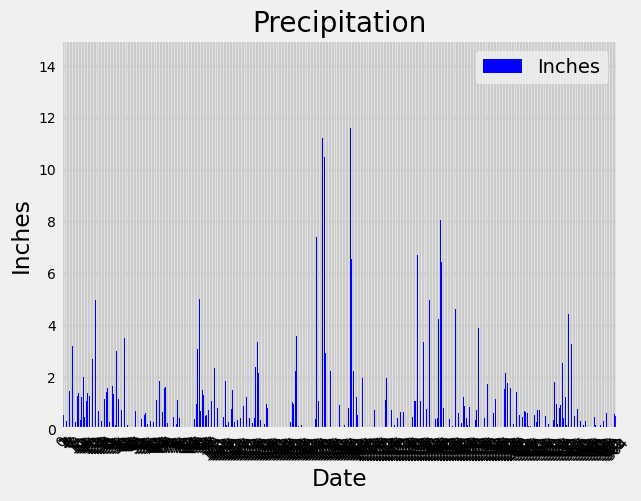

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Query All Records in the the Database

# Calculate the date one year from the last date in data set and 
# Perform a query to retrieve the data and precipitation scores
#(SELECT MAX(DATE(date),'- 12 months')

query = text("SELECT DATE(date) as date, SUM(prcp) FROM measurement where DATE(date) > '2016-08-23' GROUP BY date ORDER BY date")
precipitation_data = engine.execute(query)

#for record in precipitation_data:
#    print(record)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation_data, columns =['Date', 'Inches'])

#precip_df.head()
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(kind='bar',rot=45,fontsize=10, color='b',title="Precipitation",xlabel="Date",ylabel="Inches")

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_mean = precip_df["Inches"].mean()
print(prec_mean)
prec_med = precip_df["Inches"].median()
print(prec_med)
prec_max = precip_df["Inches"].max()
print(prec_max)
prec_min = precip_df["Inches"].min()
print(prec_min)

0.9741643835616438
0.39999999999999997
14.280000000000001
0.0


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset

session.query(station_class).count()


9

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("SELECT station, count(*) as num_active FROM measurement GROUP BY station ORDER BY num_active DESC")
active_stations = engine.execute(query)
for record in active_stations:
    print(record)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
for row in session.query(func.max(measurement_class.tobs)).filter(measurement_class.station == 'USC00519281').first():
    max_temp = str(row)
    print("The highest temperature recorded for Station USC00519281 = " + max_temp )
    
for row in session.query(func.min(measurement_class.tobs)).filter(measurement_class.station == 'USC00519281').first():
    min_temp = str(row)
    print("The lowest temperature for recorded Station USC00519281 = " + min_temp )

for row in session.query(func.avg(measurement_class.tobs)).filter(measurement_class.station == 'USC00519281').first():
    avg_temp = str(row)
    print("The average temperature for recorded Station USC00519281 = " + avg_temp )

The highest temperature recorded for Station USC00519281 = 85.0
The lowest temperature for recorded Station USC00519281 = 54.0
The average temperature for recorded Station USC00519281 = 71.66378066378067


In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = text("SELECT DATE(date) as date, tobs FROM measurement where DATE(date) > '2016-08-23' AND station = 'USC00519281' ORDER BY date")
temperature_data = engine.execute(query)

#for record in temperature_data:
#    print(record)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_df = pd.DataFrame(temperature_data, columns =['Date', 'Temperature'])



<Axes: title={'center': 'Temperatures'}, ylabel='Frequency'>

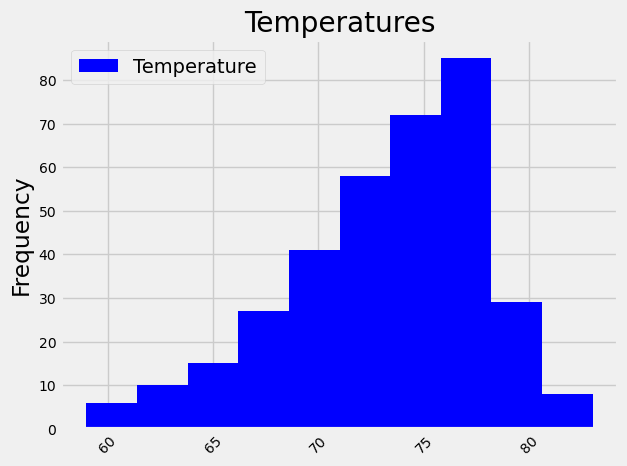

In [28]:
temp_df.plot(kind='hist',rot=45,fontsize=10, color='b',title="Temperatures",xlabel="Date",ylabel="Temperature")

# Close Session

In [31]:
# Close Session
session.close()